In [1]:
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Dataset_B_hotel.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0.0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0.0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0.0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0.0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [4]:
df.shape

(36275, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

a. Booking_ID = Pengenal unik dari tiap pemesanan
b. no_of_adults = Jumlah orang dewasa
c. no_of_children = Jumlah anak kecil
d. no_of_weekend_nights = Jumlah malam akhir pekan (Sabtu atau Minggu) tamu menginap atau
memesan untuk menginap di hotel
e. no_of_week_nights = Jumlah malam dalam seminggu (Senin hingga Jumat) tamu menginap atau
memesan untuk menginap di hotel
f. type_of_meal_plan = Jenis paket makanan yang dipesan oleh pelanggan
g. required_car_parking_space = Apakah pelanggan membutuhkan tempat parkir mobil? (0 - Tidak, 1-
Ya)
h. room_type_reserved = Jenis kamar yang dipesan oleh pelanggan. Nilai-nilai tersebut dienkripsi oleh
INN Hotels
i. lead_time = Jumlah hari antara tanggal pemesanan dan tanggal kedatangan
j. arrival_year = Tahun tanggal kedatangan
k. arrival_month = Bulan tanggal kedatangan
l. arrival_date = Tanggal kedatangan
m. market_segment_type = Penunjukan segmen pasar
n. repeated_guest = Apakah pelanggan tersebut merupakan tamu yang pernah melakukan booking dan
juga menginap? (0 - Tidak, 1- Ya)
o. no_of_previous_cancellations = Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan
sebelum pemesanan saat ini
p. no_of_previous_bookings_not_canceled = Jumlah pemesanan sebelumnya yang tidak dibatalkan
oleh pelanggan sebelum pemesanan saat ini
q. avg_price_per_room = Harga rata-rata per hari pemesanan; harga kamar bersifat dinamis. (dalam
euro)
r. no_of_special_requests = Jumlah total permintaan khusus yang dibuat oleh pelanggan (misalnya
lantai yang tinggi, pemandangan dari kamar, dan lain-lain.)
s. booking_status (target variable) = Flag yang menunjukkan apakah pemesanan dibatalkan atau tidak.

missing value di type_of_meal_plan, required_car_parking_space dan avg_price_per_room

In [6]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [7]:
for Column in df.columns:
  print(f"{df[Column].value_counts()}\n")

INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: Booking_ID, Length: 36275, dtype: int64

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64

Meal Plan 1     27157
Not Selected     4986
Meal Plan 2      3220
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

0.0    33910
1.0     1095
Name: required_car_parking_space, dtype: int64

Room_Type 1    2

split data

In [8]:
input_df=df.drop(['booking_status','Booking_ID'],axis=1)
output_df=df['booking_status']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

In [10]:
x_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
25629,2,1,2,1,Meal Plan 1,0.0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0
14473,2,1,1,1,Meal Plan 1,0.0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2
23720,2,0,0,3,Meal Plan 1,0.0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0
5843,2,0,2,5,Meal Plan 1,0.0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0
18709,1,0,0,2,Meal Plan 1,0.0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0


In [11]:
y_train.head()

25629    Not_Canceled
14473    Not_Canceled
23720        Canceled
5843     Not_Canceled
18709        Canceled
Name: booking_status, dtype: object

In [12]:
x_train.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [13]:
x_train.shape

(29020, 17)

handle missing value

In [14]:
x_train['avg_price_per_room'].value_counts()

65.00     638
75.00     624
90.00     529
95.00     498
115.00    495
         ... 
119.75      1
207.63      1
94.11       1
102.09      1
79.85       1
Name: avg_price_per_room, Length: 3432, dtype: int64

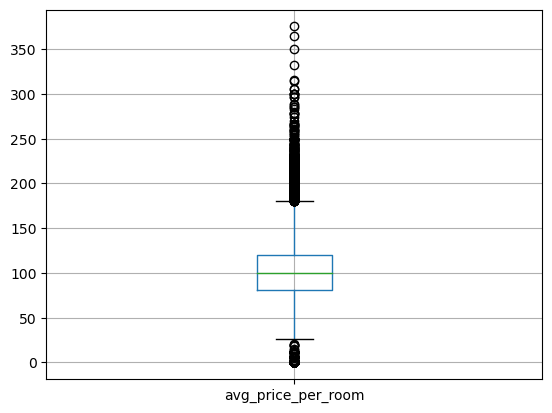

In [15]:
#check outliers untuk non object
boxplot = x_train.boxplot(column=['avg_price_per_room'])
plt.show()

In [16]:
#calculate median for avg_price_per_room
print('median avg_price_per_room:', np.median(x_train['avg_price_per_room']))

median avg_price_per_room: nan


In [17]:
#masukkan nilai ke nan untuk train dan test
x_train['avg_price_per_room'].fillna(99.9, inplace=True)
x_test['avg_price_per_room'].fillna(99.9, inplace=True)

In [18]:
#calculate mode for type_of_meal_plan dan required_car_parking_space
import statistics as sts
print(f"{sts.mode(x_train['type_of_meal_plan'])}\n")
print(f"{sts.mode(x_train['required_car_parking_space'])}")

Meal Plan 1

0.0


In [19]:
#Input missing value dengan mode
x_train['type_of_meal_plan'].fillna('Meal Plan 1', inplace=True)
x_test['type_of_meal_plan'].fillna('Meal Plan 1', inplace=True)

x_train['required_car_parking_space'].fillna(0.0, inplace=True)
x_test['required_car_parking_space'].fillna(0.0, inplace=True)

In [20]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29020 entries, 25629 to 15795
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   type_of_meal_plan                     29020 non-null  object 
 5   required_car_parking_space            29020 non-null  float64
 6   room_type_reserved                    29020 non-null  object 
 7   lead_time                             29020 non-null  int64  
 8   arrival_year                          29020 non-null  int64  
 9   arrival_month                         29020 non-null  int64  
 10  arrival_date                          29020 non-null  int64  
 11  market_segm

categorical feature encoding

In [21]:
#check value features
df['type_of_meal_plan'].value_counts()

Meal Plan 1     27157
Not Selected     4986
Meal Plan 2      3220
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [22]:
df['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [23]:
df['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [24]:
#One hot Encoding
from sklearn.preprocessing import OneHotEncoder

type_enc_train=x_train[['type_of_meal_plan']]
room_enc_train=x_train[['room_type_reserved']]
market_enc_train=x_train[['market_segment_type']]

type_enc_test=x_test[['type_of_meal_plan']]
room_enc_test=x_test[['room_type_reserved']]
market_enc_test=x_test[['market_segment_type']]

train_encoded_type=OneHotEncoder()
train_encoded_room=OneHotEncoder()
train_encoded_market=OneHotEncoder()

type_enc_train=pd.DataFrame(train_encoded_type.fit_transform(type_enc_train).toarray(),columns=train_encoded_type.get_feature_names_out())
room_enc_train=pd.DataFrame(train_encoded_room.fit_transform(room_enc_train).toarray(),columns=train_encoded_room.get_feature_names_out())
market_enc_train=pd.DataFrame(train_encoded_market.fit_transform(market_enc_train).toarray(),columns=train_encoded_market.get_feature_names_out())

type_enc_test=pd.DataFrame(train_encoded_type.transform(type_enc_test).toarray(),columns=train_encoded_type.get_feature_names_out())
room_enc_test=pd.DataFrame(train_encoded_room.transform(room_enc_test).toarray(),columns=train_encoded_room.get_feature_names_out())
market_enc_test=pd.DataFrame(train_encoded_market.transform(market_enc_test).toarray(),columns=train_encoded_market.get_feature_names_out())


x_train=x_train.reset_index()
x_test=x_test.reset_index()

x_train_enc=pd.concat([x_train,type_enc_train,room_enc_train,market_enc_train], axis=1)
x_test_enc=pd.concat([x_test,type_enc_test,room_enc_test,market_enc_test], axis=1)

In [25]:
train_encoded_market.get_feature_names_out()

array(['market_segment_type_Aviation',
       'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online'], dtype=object)

In [26]:
train_encoded_room.get_feature_names_out()

array(['room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7'], dtype=object)

In [27]:
train_encoded_type.get_feature_names_out()

array(['type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected'],
      dtype=object)

In [28]:
filename_subs = 'oneHot_encode_type.pkl'
pkl.dump(train_encoded_type, open(filename_subs, 'wb'))

filename_subs = 'oneHot_encode_room.pkl'
pkl.dump(train_encoded_room, open(filename_subs, 'wb'))

filename_subs = 'oneHot_encode_market.pkl'
pkl.dump(train_encoded_market, open(filename_subs, 'wb'))

In [29]:
x_train_enc.head()

,index,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,25629,2,1,2,1,Meal Plan 1,0.0,Room_Type 1,26,2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,14473,2,1,1,1,Meal Plan 1,0.0,Room_Type 1,98,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,23720,2,0,0,3,Meal Plan 1,0.0,Room_Type 1,433,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5843,2,0,2,5,Meal Plan 1,0.0,Room_Type 1,195,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,18709,1,0,0,2,Meal Plan 1,0.0,Room_Type 1,188,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
x_test_enc.head()

,index,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,4968,2,1,1,0,Meal Plan 1,0.0,Room_Type 1,3,2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,34540,2,0,1,2,Meal Plan 1,0.0,Room_Type 4,9,2018,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,36108,2,0,2,2,Meal Plan 1,0.0,Room_Type 1,24,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1553,2,0,0,3,Meal Plan 1,0.0,Room_Type 1,23,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,24974,2,1,0,2,Meal Plan 1,0.0,Room_Type 4,9,2018,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
x_train_enc.columns

Index(['index', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segmen

define the features

In [32]:
x_train_enc=x_train_enc.drop(['index','type_of_meal_plan', 'room_type_reserved', 'market_segment_type'],axis=1)

In [33]:
x_train_enc.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,1,2,1,0.0,26,2017,10,17,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,1,1,0.0,98,2018,7,16,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,0,0,3,0.0,433,2018,9,8,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2,0,2,5,0.0,195,2018,8,8,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0,0,2,0.0,188,2018,6,15,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
x_train_enc.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')

In [35]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(criterion= 'gini',max_depth=4)
RF_class.fit(x_train_enc, y_train)

RandomForestClassifier(max_depth=4)

In [36]:
x_test_enc=x_test_enc.drop(['index','type_of_meal_plan', 'room_type_reserved', 'market_segment_type'],axis=1)

In [37]:
y_predict=RF_class.predict(x_test_enc)

In [38]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['Not_Canceled', 'Canceled']))


Classification Report

              precision    recall  f1-score   support

Not_Canceled       0.97      0.35      0.51      2416
    Canceled       0.75      1.00      0.86      4839

    accuracy                           0.78      7255
   macro avg       0.86      0.67      0.68      7255
weighted avg       0.83      0.78      0.74      7255



karena xgboost harus numeric maka binary encoding pada y_train dan y_test

In [39]:
y_train.head()

25629    Not_Canceled
14473    Not_Canceled
23720        Canceled
5843     Not_Canceled
18709        Canceled
Name: booking_status, dtype: object

xgboost label harus berupa numerik

In [40]:
ytrain_encode={"Canceled": 0, "Not_Canceled": 1}
y_train = y_train.replace(ytrain_encode)
y_test = y_test.replace(ytrain_encode)

In [41]:
y_train.head()

25629    1
14473    1
23720    0
5843     1
18709    0
Name: booking_status, dtype: int64

In [42]:
ytrain_encode

{'Canceled': 0, 'Not_Canceled': 1}

In [43]:
filename = 'booking_encode.pkl'
pkl.dump(ytrain_encode, open(filename, 'wb'))

In [44]:
#!pip install xgboost

In [45]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(x_train_enc, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [46]:
y_pred_xgb = xgb_model.predict(x_test_enc)

In [47]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_xgb, target_names=['Not_Canceled', 'Canceled']))


Classification Report

              precision    recall  f1-score   support

Not_Canceled       0.86      0.80      0.83      2416
    Canceled       0.90      0.94      0.92      4839

    accuracy                           0.89      7255
   macro avg       0.88      0.87      0.87      7255
weighted avg       0.89      0.89      0.89      7255



algoritma yang terbaik berupa xgboost

In [48]:
filename = 'XGB_booking.pkl'
pkl.dump(xgb_model, open(filename, 'wb'))

Checking some features value for deployment

In [49]:
df['arrival_date'].describe()

count    36275.000000
mean        15.596995
std          8.740447
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: arrival_date, dtype: float64

In [50]:
df['arrival_month'].describe()

count    36275.000000
mean         7.423653
std          3.069894
min          1.000000
25%          5.000000
50%          8.000000
75%         10.000000
max         12.000000
Name: arrival_month, dtype: float64

In [51]:
df['arrival_year'].describe()

count    36275.000000
mean      2017.820427
std          0.383836
min       2017.000000
25%       2018.000000
50%       2018.000000
75%       2018.000000
max       2018.000000
Name: arrival_year, dtype: float64

In [52]:
df['avg_price_per_room'].describe()

count    34643.000000
mean       103.447208
std         35.158417
min          0.000000
25%         80.300000
50%         99.450000
75%        120.275000
max        540.000000
Name: avg_price_per_room, dtype: float64

In [53]:
df['booking_status'].describe()

count            36275
unique               2
top       Not_Canceled
freq             24390
Name: booking_status, dtype: object

In [54]:
df['market_segment_type'].describe()

count      36275
unique         5
top       Online
freq       23214
Name: market_segment_type, dtype: object

In [55]:
df['lead_time'].describe()

count    36275.000000
mean        85.232557
std         85.930817
min          0.000000
25%         17.000000
50%         57.000000
75%        126.000000
max        443.000000
Name: lead_time, dtype: float64

In [56]:
df['no_of_adults'].describe()

count    36275.000000
mean         1.844962
std          0.518715
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: no_of_adults, dtype: float64

In [57]:
df['no_of_children'].describe()

count    36275.000000
mean         0.105279
std          0.402648
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: no_of_children, dtype: float64

In [58]:
df['no_of_previous_bookings_not_canceled'].describe()

count    36275.000000
mean         0.153411
std          1.754171
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         58.000000
Name: no_of_previous_bookings_not_canceled, dtype: float64

In [59]:
df['no_of_previous_cancellations'].describe()

count    36275.000000
mean         0.023349
std          0.368331
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: no_of_previous_cancellations, dtype: float64

In [60]:
df['no_of_special_requests'].describe()

count    36275.000000
mean         0.619655
std          0.786236
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: no_of_special_requests, dtype: float64

In [61]:
df['no_of_week_nights'].describe()

count    36275.000000
mean         2.204300
std          1.410905
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         17.000000
Name: no_of_week_nights, dtype: float64

In [62]:
df['no_of_weekend_nights'].describe()

count    36275.000000
mean         0.810724
std          0.870644
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: no_of_weekend_nights, dtype: float64

In [63]:
df['repeated_guest'].describe()

count    36275.000000
mean         0.025637
std          0.158053
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: repeated_guest, dtype: float64

In [64]:
df['required_car_parking_space'].describe()

count    35005.000000
mean         0.031281
std          0.174079
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: required_car_parking_space, dtype: float64

In [65]:
df['room_type_reserved'].describe()

count           36275
unique              7
top       Room_Type 1
freq            28130
Name: room_type_reserved, dtype: object

In [66]:
df['type_of_meal_plan'].describe()

count           35368
unique              4
top       Meal Plan 1
freq            27157
Name: type_of_meal_plan, dtype: object

In [67]:
conda list scikit

# packages in environment at c:\Users\Khansa\anaconda3:
#
# Name                    Version                   Build  Channel
scikit-image              0.20.0          py311h3513d60_0  
scikit-learn              1.3.2                    pypi_0    pypi
scikit-learn-intelex      2023.1.1        py311haa95532_0  

Note: you may need to restart the kernel to use updated packages.


In [68]:
import xgboost
print(xgboost.__version__)

1.6.0


In [69]:
#!pip uninstall xgboost
#%pip install xgboost==1.6.0

In [70]:
#%pip install scikit-learn==1.0.2